In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from mdp_lib.domains.gridworld import GridWorld
from mdp_lib.domains.gridworldvis import visualize_trajectory, plot_text

# Reward Function Teaching Experiment Notes
- Gridworld is indexed (x, y) with lower left as (0, 0)
- Actions are north ('^'), south ('v'), east ('>'), west ('<')
- Reward functions are coded by color. E.g., 'oox' means 
orange is safe, purple is safe, and cyan is dangerous

In [17]:
gw = GridWorld(gridworld_array=[
    '.oooo.',
    '.oppp.',
    '.opccy',
    '.oppc.',
    '.cccc.'
])
feature_colors = {
    'p':'purple', 
    'c':'cyan', 
    'o':'orange',
    'y':'yellow'
}
rf_order = ['ooo', 'xoo', 'oox', 'oxo', 'xox', 'xxo', 'oxx', 'xxx']
cond_order = ['do', 'show']

trials = pd.read_pickle('./data/teaching-trials.pd.pkl')
trials = trials[trials['phase'] == 'demonstration']

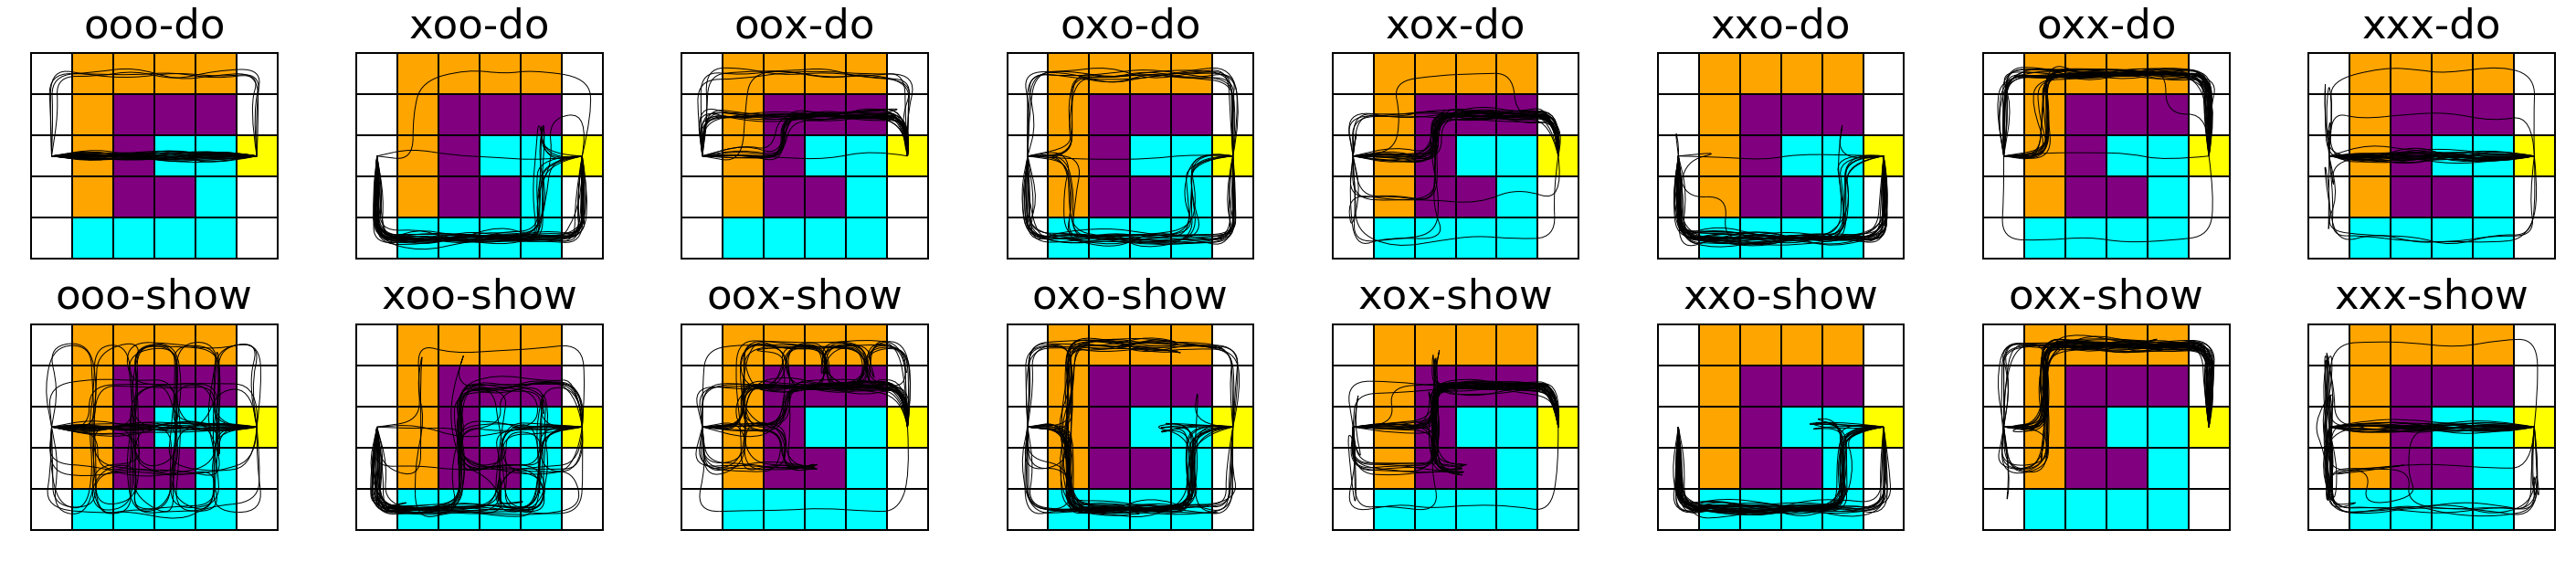

In [43]:
# Plot all participants
fig, axes = plt.subplots(2, 8, figsize=(50, 10))
gwps = {}
for x, rf in enumerate(rf_order):
    for y, cond in enumerate(cond_order):
        ax = axes[y][x]
        ax.set_title('%s-%s' % (rf, cond), fontsize=45)
        gwp = gw.plot(ax=ax, feature_colors=feature_colors)
        gwps[(rf, cond)] = gwp

for (rf, cond, p), ptrials in trials.groupby(['rf', 'cond', 'participant']):
    ptrials = ptrials.sort_values('timestep')
    traj = list(ptrials['stateaction']) + [((5, 2), 'x'), ]
    gwp = gwps[(rf, cond)]
    visualize_trajectory(gwp, traj)
fig.savefig('./plots/all_participants.pdf')

In [14]:
# Plot individual participants
for (p, cond), ptrials in trials.groupby(['participant', 'cond']):
    fig, axes = plt.subplots(1, 8, figsize=(50, 8))
    fig.suptitle("%s (%s)" % (p, cond), fontsize=50)
    for i, (rf, ptrials) in enumerate(ptrials.groupby('rf')):
        ptrials = ptrials.sort_values('timestep')
        traj = list(ptrials['stateaction']) + [((5, 2), 'x'), ]
        gwp = gw.plot(ax=axes[i], feature_colors=feature_colors)
        visualize_trajectory(gwp, traj, lw=6, color='red', outline=True)
        axes[i].set_title(rf, fontsize=45)
    fig.savefig('./plots/%s-%s.pdf' % (cond, p))
    plt.close()

# Learning Study

In [18]:
responses = pd.read_pickle('data/learning-responses.pd.pkl')

(0.6, 0.85)

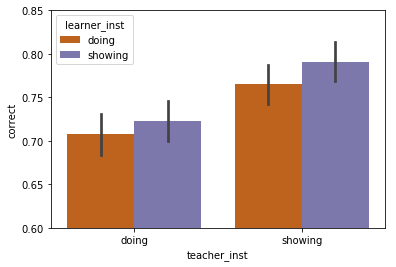

In [21]:
sns.barplot(data=responses, y='correct', x='teacher_inst', hue='learner_inst',
            order=['doing', 'showing'], hue_order=['doing', 'showing'],
            palette=sns.color_palette("Dark2")[1:])
plt.ylim(.6, .85)

(65, 85)

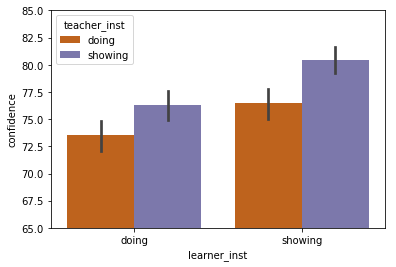

In [22]:
sns.barplot(data=responses, y='confidence', x='learner_inst', hue='teacher_inst',
            order=['doing', 'showing'], hue_order=['doing', 'showing'],
            palette=sns.color_palette("Dark2")[1:])
plt.ylim(65, 85)

# Both Studies

In [42]:
# Check that teacher IDs from the two studies match up
teacher_id_cond = trials.groupby('participant').\
    apply(lambda t: t.iloc[0]['cond']).reset_index()
teacher_id_cond['teacher_id'] = teacher_id_cond['participant'].\
    apply(lambda i: i.replace('S', ''))
teacher_id_cond['teacher_cond'] = teacher_id_cond[0]
teacher_id_cond = teacher_id_cond[['teacher_id', 'teacher_cond']]

learner_t_id_cond = responses.groupby('teacher_id').\
    apply(lambda t: t.iloc[0]['teacher_inst']).reset_index()
learner_t_id_cond['teacher_cond'] = learner_t_id_cond[0].apply(lambda c : c[:-3])
learner_t_id_cond['teacher_id'] = learner_t_id_cond['teacher_id'].\
    apply(lambda i: i.replace('s_', ''))
learner_t_id_cond = learner_t_id_cond[['teacher_id', 'teacher_cond']]

merged = learner_t_id_cond.merge(teacher_id_cond, on='teacher_id')

merged['teacher_cond_x'].equals(merged['teacher_cond_y'])

True